# **Práctica 3: Contrato con Payoff Parametrizado y Replicación con Opciones**


**Introducción:**

El objetivo de esta práctica es analizar un contrato financiero cuyo payoff depende de un parámetro h>0.

El payoff del contrato es:

Donde:
   K = 100 (strike price)
   S_T = precio del activo subyacente al vencimiento
   h = parámetro de suavización

 Las tareas a realizar son:
 1. Dibujar el payoff para K=100 y distintos valores de h
 2. Construir una cartera de opciones que replique este payoff
 3. Analizar a qué perfil converge el payoff cuando h → 0
 4. Expresar el precio del instrumento para h≃0 en función de los precios de opciones

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**1. Definición del Payoff del Contrato**

Primero implementamos la función que calcula el payoff del contrato para diferentes valores de S_T.

In [3]:
# --- 1. Definición del Payoff del Contrato ---
K = 100    # Strike price fijo

def payoff_contrato(S_T, K, h):
    """
    Calcula el payoff del contrato para un array de precios S_T

    Parámetros:
    S_T : array, precios del activo al vencimiento
    K   : float, strike price
    h   : float, parámetro de suavización (h > 0)

    Retorna:
    array con los payoffs correspondientes
    """
    payoff = np.zeros_like(S_T)

    # Caso 1: S_T < K → payoff = 0
    mask_1 = S_T < K
    payoff[mask_1] = 0

    # Caso 2: K ≤ S_T < K+h → payoff = (S_T - K)/h
    mask_2 = (S_T >= K) & (S_T < K + h)
    payoff[mask_2] = (S_T[mask_2] - K) / h

    # Caso 3: S_T ≥ K+h → payoff = 1
    mask_3 = S_T >= K + h
    payoff[mask_3] = 1

    return payoff

**2. Visualización del Payoff para Diferentes Valores de h**

Generamos gráficos para visualizar cómo cambia la forma del payoff al variar el parámetro h.

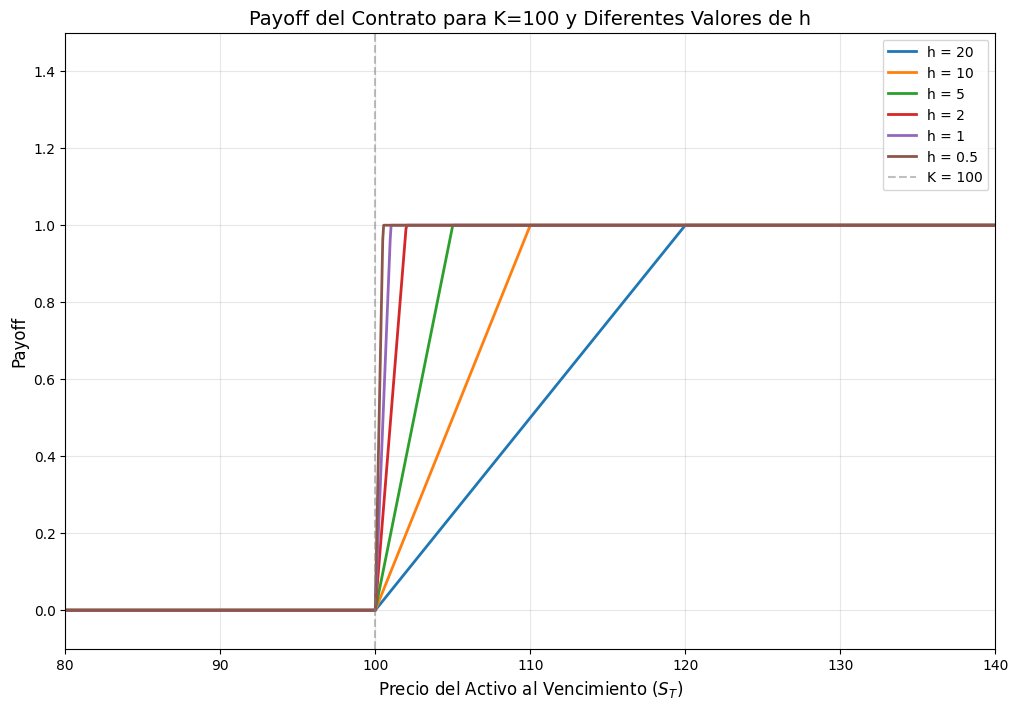

In [4]:
# --- 2. Visualización del Payoff para Diferentes Valores de h ---
# Definimos un rango de precios S_T
S_T = np.linspace(80, 140, 1000)

# Valores de h a analizar
h_values = [20, 10, 5, 2, 1, 0.5]

plt.figure(figsize=(12, 8))

for h in h_values:
    payoff = payoff_contrato(S_T, K, h)
    plt.plot(S_T, payoff, label=f'h = {h}', linewidth=2)

plt.axvline(x=K, color='gray', linestyle='--', alpha=0.5, label=f'K = {K}')
plt.xlabel('Precio del Activo al Vencimiento ($S_T$)', fontsize=12)
plt.ylabel('Payoff', fontsize=12)
plt.title('Payoff del Contrato para K=100 y Diferentes Valores de h', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(80, 140)
plt.ylim(-0.1, 1.5)
plt.show()

**3. Replicación del Payoff con una Cartera de Opciones**

Demostramos que el contrato puede replicarse exactamente con un call spread.

--- VERIFICACIÓN DE LA REPLICACIÓN ---
Para h = 5:
Diferencia máxima entre payoff original y cartera: 1.11e-16
(Valor cercano a cero confirma la replicación exacta)



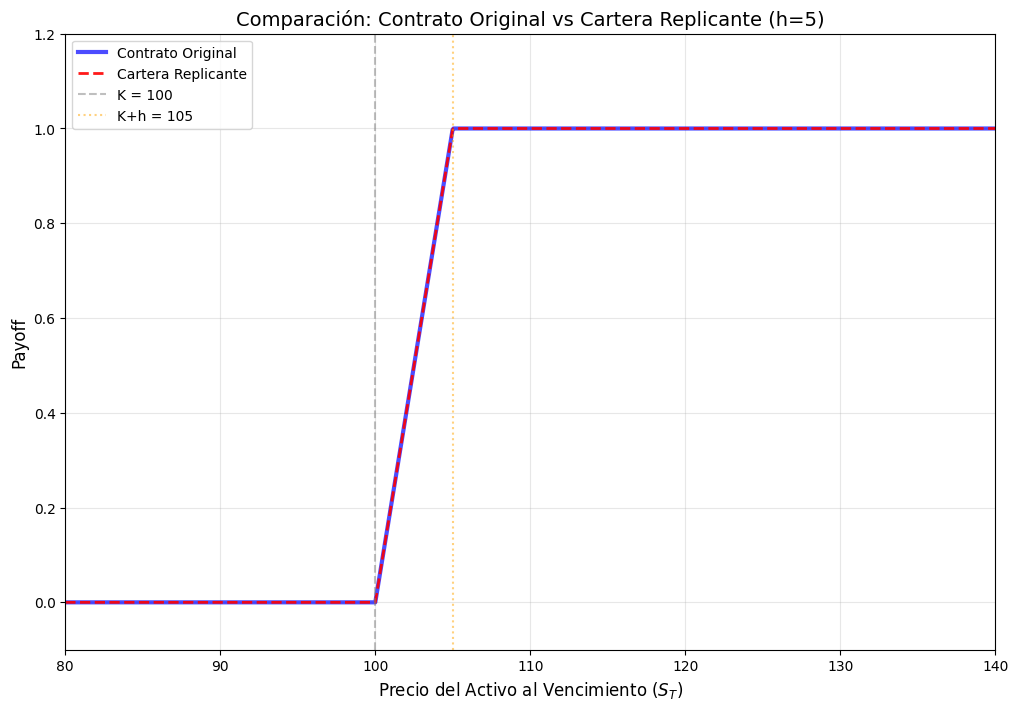

In [5]:
# --- 3. Replicación del Payoff con una Cartera de Opciones ---
# Definimos el payoff de una opción call europea estándar
def payoff_call(S_T, strike):
    """
    Payoff de una opción call europea
    """
    return np.maximum(S_T - strike, 0)

# Cartera replicante: (1/h)*[Call(K) - Call(K+h)]
def payoff_cartera_replicante(S_T, K, h):
    """
    Payoff de la cartera replicante
    """
    call_K = payoff_call(S_T, K)
    call_Kh = payoff_call(S_T, K + h)
    return (1/h) * (call_K - call_Kh)

# Comparamos el payoff del contrato con el de la cartera replicante
h_ejemplo = 5

payoff_original = payoff_contrato(S_T, K, h_ejemplo)
payoff_replicante = payoff_cartera_replicante(S_T, K, h_ejemplo)

plt.figure(figsize=(12, 8))
plt.plot(S_T, payoff_original, 'b-', linewidth=3, label='Contrato Original', alpha=0.7)
plt.plot(S_T, payoff_replicante, 'r--', linewidth=2, label='Cartera Replicante', alpha=0.9)

# Verificación numérica de la equivalencia
diferencia_maxima = np.max(np.abs(payoff_original - payoff_replicante))
print("--- VERIFICACIÓN DE LA REPLICACIÓN ---")
print(f"Para h = {h_ejemplo}:")
print(f"Diferencia máxima entre payoff original y cartera: {diferencia_maxima:.2e}")
print("(Valor cercano a cero confirma la replicación exacta)\n")

plt.axvline(x=K, color='gray', linestyle='--', alpha=0.5, label=f'K = {K}')
plt.axvline(x=K + h_ejemplo, color='orange', linestyle=':', alpha=0.5, label=f'K+h = {K+h_ejemplo}')
plt.xlabel('Precio del Activo al Vencimiento ($S_T$)', fontsize=12)
plt.ylabel('Payoff', fontsize=12)
plt.title(f'Comparación: Contrato Original vs Cartera Replicante (h={h_ejemplo})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(80, 140)
plt.ylim(-0.1, 1.2)
plt.show()

**4. Análisis del Límite cuando h → 0**

Estudiamos a qué perfil converge el payoff cuando el parámetro h tiende a cero.

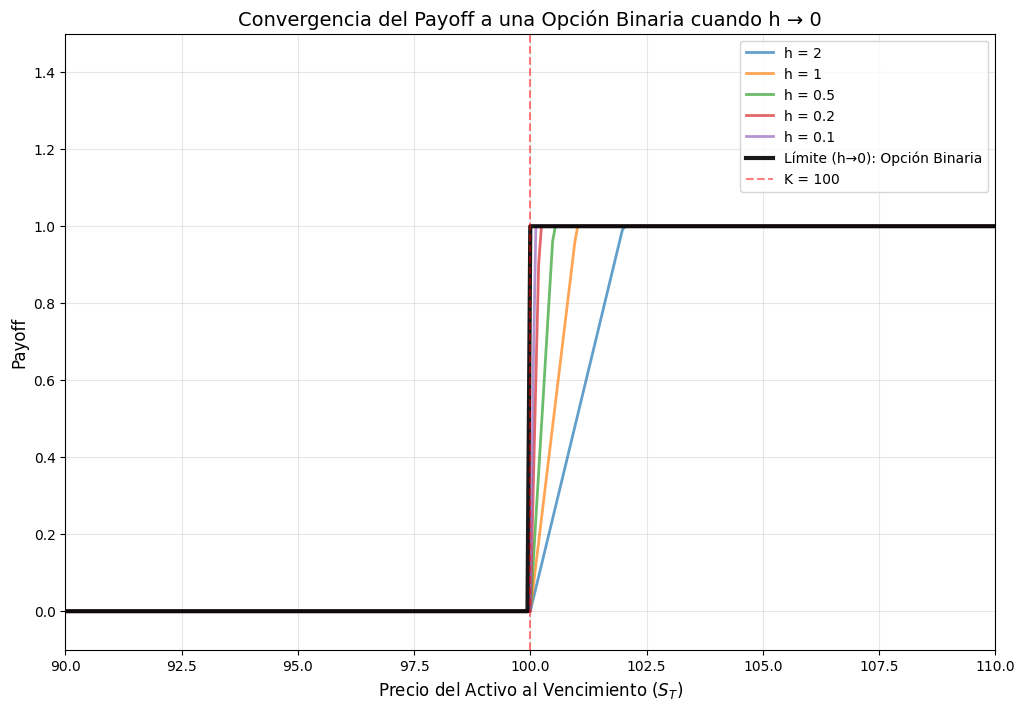

--- CONCLUSIÓN DEL ANÁLISIS DEL LÍMITE ---
Cuando h → 0, el payoff del contrato converge a:
pay-off(h→0) = 1 si S_T ≥ K
pay-off(h→0) = 0 si S_T < K
Es decir, converge a una opción binaria (cash-or-nothing call)



In [6]:
# --- 4. Análisis del Límite cuando h → 0 ---
# Definimos el payoff de una opción binaria (cash-or-nothing call)
def payoff_binaria(S_T, K):
    """
    Payoff de una opción binaria que paga 1 si S_T ≥ K
    """
    return np.where(S_T >= K, 1, 0)

# Visualizamos la convergencia
h_pequenos = [2, 1, 0.5, 0.2, 0.1]

plt.figure(figsize=(12, 8))

for h in h_pequenos:
    payoff = payoff_contrato(S_T, K, h)
    plt.plot(S_T, payoff, label=f'h = {h}', linewidth=2, alpha=0.7)

# Payoff límite (opción binaria)
payoff_limite = payoff_binaria(S_T, K)
plt.plot(S_T, payoff_limite, 'k-', linewidth=3, label='Límite (h→0): Opción Binaria', alpha=0.9)

plt.axvline(x=K, color='red', linestyle='--', alpha=0.5, label=f'K = {K}')
plt.xlabel('Precio del Activo al Vencimiento ($S_T$)', fontsize=12)
plt.ylabel('Payoff', fontsize=12)
plt.title('Convergencia del Payoff a una Opción Binaria cuando h → 0', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(90, 110)  # Zoom cerca de K para ver mejor la convergencia
plt.ylim(-0.1, 1.5)
plt.show()

print("--- CONCLUSIÓN DEL ANÁLISIS DEL LÍMITE ---")
print("Cuando h → 0, el payoff del contrato converge a:")
print("pay-off(h→0) = 1 si S_T ≥ K")
print("pay-off(h→0) = 0 si S_T < K")
print("Es decir, converge a una opción binaria (cash-or-nothing call)\n")

**5. Precio del Instrumento para h ≃ 0**

Expresamos el precio del contrato para valores pequeños de h en función de los precios de las opciones.

In [7]:
# --- 5. Precio del Instrumento para h ≃ 0 ---
# Para demostrar la relación teórica, necesitamos precios de opciones
# Usaremos el modelo Black-Scholes para calcular precios

from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Calcula el precio de una opción call europea usando Black-Scholes

    Parámetros:
    S     : precio spot del activo
    K     : strike price
    T     : tiempo al vencimiento (en años)
    r     : tasa de interés libre de riesgo
    sigma : volatilidad

    Retorna:
    Precio de la opción call
    """
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    precio = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    return precio

def precio_binaria_bs(S, K, T, r, sigma):
    """
    Precio de una opción binaria cash-or-nothing call usando Black-Scholes
    """
    d2 = (np.log(S/K) + (r - 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return np.exp(-r*T) * norm.cdf(d2)

# Parámetros de ejemplo
S0 = 100     # Precio spot actual
T = 1        # Tiempo al vencimiento (1 año)
r = 0.05     # Tasa libre de riesgo (5%)
sigma = 0.2  # Volatilidad (20%)

print("--- CÁLCULO DE PRECIOS (EJEMPLO NUMÉRICO) ---")
print(f"Parámetros: S0 = {S0}, K = {K}, T = {T}, r = {r}, sigma = {sigma}")
print("-" * 60)

# Precio usando la cartera replicante para diferentes h
print("Precios del contrato usando replicación con call spreads:")
for h in [10, 5, 2, 1, 0.5, 0.1]:
    C_K = black_scholes_call(S0, K, T, r, sigma)
    C_Kh = black_scholes_call(S0, K + h, T, r, sigma)
    precio_contrato = (1/h) * (C_K - C_Kh)
    print(f"  h = {h:4.1f} → Precio = {precio_contrato:.6f}")

print("-" * 60)

# Precio límite (h → 0) usando derivada
h_muy_pequeno = 0.001
C_K = black_scholes_call(S0, K, T, r, sigma)
C_Kh = black_scholes_call(S0, K + h_muy_pequeno, T, r, sigma)
derivada_numerica = (C_Kh - C_K) / h_muy_pequeno

print("APROXIMACIÓN PARA h MUY PEQUEÑO:")
print(f"Derivada numérica de C(K) respecto a K: {derivada_numerica:.6f}")
print(f"Precio usando -∂C/∂K ≈ {-(C_Kh - C_K)/h_muy_pequeno:.6f}")

# Precio exacto de la opción binaria
precio_binaria = precio_binaria_bs(S0, K, T, r, sigma)
print(f"Precio exacto opción binaria: {precio_binaria:.6f}")
print("\n--- RELACIÓN TEÓRICA ---")
print("Para h ≃ 0, el precio del contrato se aproxima por:")
print("V(h) ≈ -∂C(K)/∂K")
print("donde C(K) es el precio de una call con strike K.")
print("Esta expresión es el precio de una opción binaria cash-or-nothing call.")

--- CÁLCULO DE PRECIOS (EJEMPLO NUMÉRICO) ---
Parámetros: S0 = 100, K = 100, T = 1, r = 0.05, sigma = 0.2
------------------------------------------------------------
Precios del contrato usando replicación con call spreads:
  h = 10.0 → Precio = 0.441050
  h =  5.0 → Precio = 0.485846
  h =  2.0 → Precio = 0.513609
  h =  1.0 → Precio = 0.522954
  h =  0.5 → Precio = 0.527637
  h =  0.1 → Precio = 0.531387
------------------------------------------------------------
APROXIMACIÓN PARA h MUY PEQUEÑO:
Derivada numérica de C(K) respecto a K: -0.532315
Precio usando -∂C/∂K ≈ 0.532315
Precio exacto opción binaria: 0.532325

--- RELACIÓN TEÓRICA ---
Para h ≃ 0, el precio del contrato se aproxima por:
V(h) ≈ -∂C(K)/∂K
donde C(K) es el precio de una call con strike K.
Esta expresión es el precio de una opción binaria cash-or-nothing call.


**6. Resumen de Resultados y Conclusión**

In [8]:
# --- 6. Resumen de Resultados ---
print("\n" + "="*70)
print("RESUMEN DE LA PRÁCTICA")
print("="*70)
print("\n1. PAYOFF DEL CONTRATO:")
print("   - Para S_T < K: payoff = 0")
print("   - Para K ≤ S_T < K+h: payoff = (S_T - K)/h (crecimiento lineal)")
print("   - Para S_T ≥ K+h: payoff = 1")
print("\n2. REPLICACIÓN EXACTA:")
print("   Cartera replicante = (1/h) × [Call(K) - Call(K+h)]")
print("   Esta cartera produce exactamente el mismo payoff que el contrato")
print("\n3. LÍMITE CUANDO h → 0:")
print("   El payoff converge a una función escalón en K")
print("   Contrato(h→0) = Opción binaria cash-or-nothing call")
print("\n4. PRECIO PARA h ≃ 0 EN FUNCIÓN DE PRECIOS DE OPCIONES:")
print("   V(h) ≈ -∂C(K)/∂K")
print("   Usando precios de calls con strikes cercanos:")
print("   V ≈ - [C(K+Δ) - C(K-Δ)] / (2Δ)")
print("   donde:")
print("   - C(K) es el precio de una call con strike K")
print("   - Δ es pequeño (ej. Δ = 0.5, 1 punto)")
print("   - Los precios C(K+Δ) y C(K-Δ) deben ser conocidos del mercado")
print("   Esta expresión es el precio de una opción binaria cash-or-nothing call")
print("\n5. INTERPRETACIÓN FINANCIERA:")
print("   El contrato es una 'opción binaria suavizada'")
print("   El parámetro h controla el grado de suavización")
print("   h grande → transición suave, h pequeño → transición brusca")
print("="*70)


RESUMEN DE LA PRÁCTICA

1. PAYOFF DEL CONTRATO:
   - Para S_T < K: payoff = 0
   - Para K ≤ S_T < K+h: payoff = (S_T - K)/h (crecimiento lineal)
   - Para S_T ≥ K+h: payoff = 1

2. REPLICACIÓN EXACTA:
   Cartera replicante = (1/h) × [Call(K) - Call(K+h)]
   Esta cartera produce exactamente el mismo payoff que el contrato

3. LÍMITE CUANDO h → 0:
   El payoff converge a una función escalón en K
   Contrato(h→0) = Opción binaria cash-or-nothing call

4. PRECIO PARA h ≃ 0 EN FUNCIÓN DE PRECIOS DE OPCIONES:
   V(h) ≈ -∂C(K)/∂K
   Usando precios de calls con strikes cercanos:
   V ≈ - [C(K+Δ) - C(K-Δ)] / (2Δ)
   donde:
   - C(K) es el precio de una call con strike K
   - Δ es pequeño (ej. Δ = 0.5, 1 punto)
   - Los precios C(K+Δ) y C(K-Δ) deben ser conocidos del mercado
   Esta expresión es el precio de una opción binaria cash-or-nothing call

5. INTERPRETACIÓN FINANCIERA:
   El contrato es una 'opción binaria suavizada'
   El parámetro h controla el grado de suavización
   h grande → tran